## Fuzzy Evaluation of FSL's FLIRT and FAST

In [1]:
import nibabel as nib
import numpy as np
from nilearn import plotting

/Users/greg/code/env/stability/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
image_filename = '/Users/greg/code/gkiar/fuzzy/examples/flirt-out-p15_15.nii.gz'
im = nib.load(image_filename)

In [108]:
mask = "/Users/Shared/Relocated_Items/Security/data/template/fsl-atlases/standard/MNI152_T1_1mm_brain_mask.nii.gz"
mask_im = nib.load(mask)

In [73]:
im.get_data_dtype() in [np.int16, np.int32]

True

In [89]:
def sigdig(im):
    dtype = im.get_data_dtype()
    if dtype in [np.int16, np.float16]:
        eps = np.finfo(np.float16).eps
    else:
        eps = np.finf(np.float32).eps
    dat = im.get_data()
    sigs = -np.log2(np.std(dat, axis=3) / np.mean(dat, axis=3) + eps)
    sigs = np.nan_to_num(sigs)
    sigs[sigs < 0] == 0
    sig_image = nib.Nifti1Image(sigs, im.affine, im.header)
    return sig_image


def variance_from_images(im):
    dat = im.get_data()
    std = np.std(dat, axis=3) / (np.mean(dat,axis=3) + np.finfo(float).eps)

    std_image = nib.Nifti1Image(std, im.affine, im.header)
    return std_image

In [90]:
std_im = variance_from_images(im)
nib.save(std_im,'/Users/greg/code/gkiar/fuzzy/examples/flirt-out-p15_15_std.nii.gz')

sig_im = sigdig(im)
nib.save(sig_im,'/Users/greg/code/gkiar/fuzzy/examples/flirt-out-p15_15_sigdig.nii.gz')
print(np.mean(sig_im.get_data()))

/Users/greg/code/env/stability/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
4.901945056458188


In [109]:
sig_im_dat = sig_im.get_data()
mask_im_dat = mask_im.get_data()

mask_locs = mask_im_dat > 0
print(np.mean(sig_im_dat[mask_locs]))

6.763424533132404


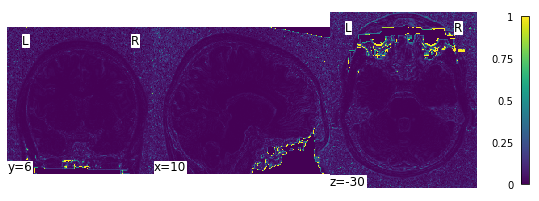

In [91]:
# plotting.plot_stat_map(var_im)   # cut_coords=[10, 6, -30]
plotting.plot_img(std_im, draw_cross=False, colorbar=True, cut_coords=[10, 6, -30], black_bg=False, vmin=0, vmax=1)
# title="Normalized Variance from FSL Flirt MCA (p=15)"
# plotting.plot_anat(var_im)

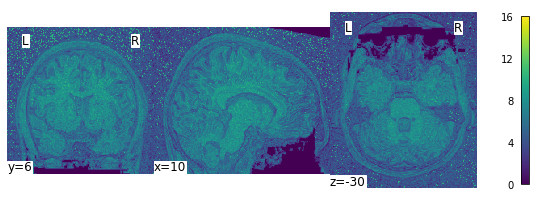

In [95]:
plotting.plot_img(sig_im, draw_cross=False, colorbar=True, cut_coords=[10, 6, -30], black_bg=False, vmin=0, vmax=16)
# plotting.plot_stat_map(sig_im, draw_cross=False, symmetric_cbar=False)

In [100]:
image_filename = '/Users/greg/code/gkiar/fuzzy/examples/fuzzy_fast_15.nii.gz'
im2 = nib.load(image_filename)

In [101]:
std_im2 = variance_from_images(im2)

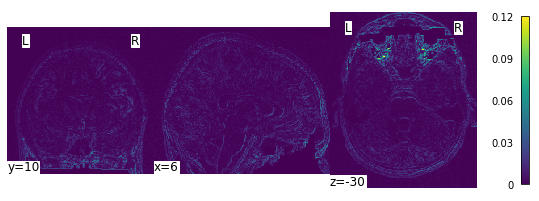

In [102]:
plotting.plot_img(std_im2, draw_cross=False, colorbar=True, black_bg=False)

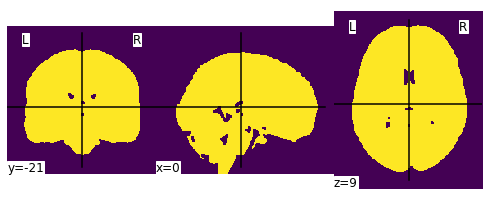

In [107]:
plotting.plot_img(mask_im)